In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt
from statsmodels import robust
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pylab

In [2]:
#Importing the dataset
df_cancer = pd.read_csv("haberman.csv")

In [3]:
#Looking at the shape of the data
df_cancer.shape

#This dataset has 306 rows and 4 columns

(306, 4)

#### Objective:
To find a feature or a combination of features by which we will be able to distinctly classify the observations as    survived/not survived.

In [4]:
#Looking at first few rows of the dataset
df_cancer.head()

,Age,year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### Attributes information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [5]:
df_cancer.describe()

,Age,year,positive_axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### The above table gives statistical description of each attribute.

## Univariate Analysis:

[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


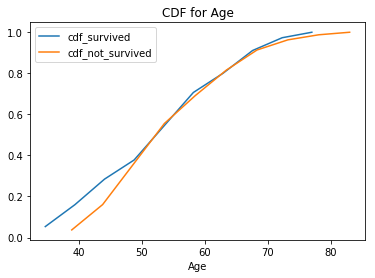

In [7]:
counts_1,bins_1=np.histogram(df_cancer["Age"][df_cancer.survival_status==1],bins=10,density=True)
print(counts_1)
print(bins_1)
pdf_1=counts_1*np.diff(bins_1)
cdf_1=np.cumsum(pdf_1)
plt.plot(bins_1[1:],cdf_1,label="cdf_survived")

counts_2,bins_2=np.histogram(df_cancer["Age"][df_cancer.survival_status==2],bins=10,density=True)
print(counts_2)
print(bins_2)
pdf_2=counts_2*np.diff(bins_2)
cdf_2=np.cumsum(pdf_2)
plt.plot(bins_2[1:],cdf_2,label="cdf_not_survived")
plt.xlabel("Age")
plt.legend()
plt.title("CDF for Age")
plt.show()

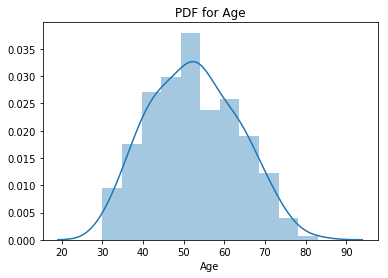

In [8]:
#pdf for Age
plt.close()
sns.distplot(df_cancer.Age)
plt.title("PDF for Age")
plt.show()

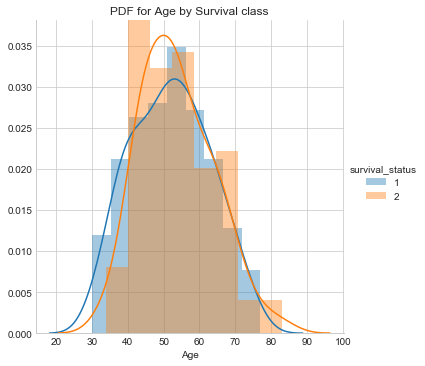

In [9]:
#Probability density plot for Age by survival class.
sns.set_style("whitegrid")
sns.FacetGrid(df_cancer,hue="survival_status",size=5)\
   .map(sns.distplot,"Age")\
   .add_legend();
plt.title("PDF for Age by Survival class")
plt.show()

#### Conclusion:
   1. Almost 85% of the points overlap.From cdf curve.
   2. 85% of those survived are in the same age group with those who do not survived.
   2. Using only the "Age" attribute we can't achieve classification upon survival_status.

[0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


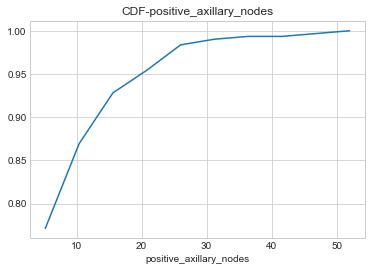

In [10]:
#cdf curve for "positive_axillary_nodes".
counts,bins=np.histogram(df_cancer["positive_axillary_nodes"],bins=10,density=True)
print(counts)
print(bins)
pdf=counts*np.diff(bins)
cdf=np.cumsum(pdf)
plt.plot(bins[1:],cdf,label="cdf_survived")
plt.xlabel("positive_axillary_nodes")
plt.title("CDF-positive_axillary_nodes")
plt.show()

#### Conclusion:
      1.There are outliers.
      2.Top 2% of the points can be considered as outliers.
      3.Around 80% of patients have positive axillary nodes<5.

[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.10921178 0.02849003 0.02611586 0.00949668 0.01424501 0.
 0.00237417 0.         0.         0.00237417]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


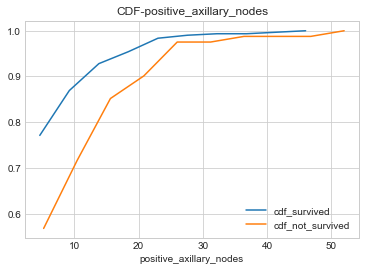

In [11]:
#cdf curve for "positive_axillary_nodes" by survival status.
plt.close()
counts_1,bins_1=np.histogram(df_cancer["positive_axillary_nodes"][df_cancer.survival_status==1],bins=10,density=True)
print(counts_1)
print(bins_1)
pdf_1=counts*np.diff(bins)
cdf_1=np.cumsum(pdf_1)
plt.plot(bins_1[1:],cdf_1,label="cdf_survived")

counts_2,bins_2=np.histogram(df_cancer["positive_axillary_nodes"][df_cancer.survival_status==2],bins=10,density=True)
print(counts_2)
print(bins_2)
pdf_2=counts_2*np.diff(bins_2)
cdf_2=np.cumsum(pdf_2)
plt.plot(bins_2[1:],cdf_2,label="cdf_not_survived")
plt.xlabel("positive_axillary_nodes")
plt.legend()
plt.title("CDF-positive_axillary_nodes")
plt.show()

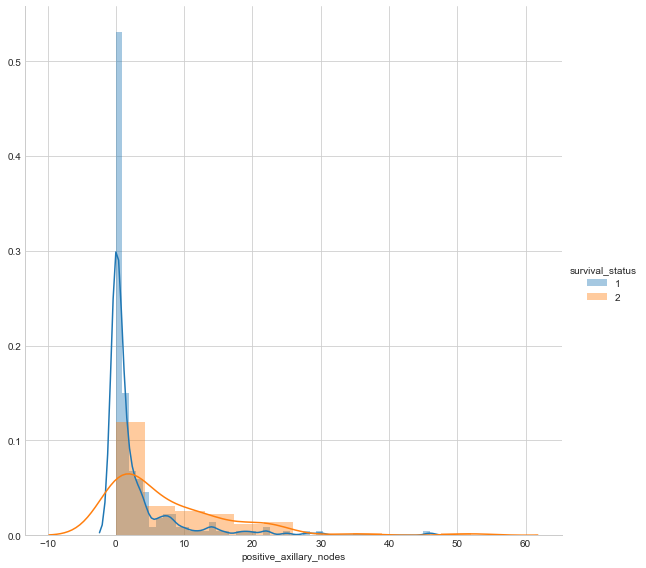

In [13]:
#Probability Density plot for positive_axillary_nodes
plt.close()
sns.set_style("whitegrid")
sns.FacetGrid(df_cancer,hue="survival_status",size=8)\
   .map(sns.distplot,"positive_axillary_nodes")\
   .add_legend();
plt.show()

#### Conclusion:
  1. Less no. of positive node implies higher survival chances.88% of those who survived have positive axillary node<10.(from cdf curve).
  2.  There's almost 99% overlap betwee the two classes when we look for positive axillary nodes of those who survived and those who didn't.

[0.16969697 0.0969697  0.09292929 0.06464646 0.08888889 0.09292929
 0.06060606 0.08888889 0.08484848 0.06868687]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.23569024 0.04489338 0.03367003 0.07856341 0.08978676 0.08978676
 0.14590348 0.06734007 0.04489338 0.07856341]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


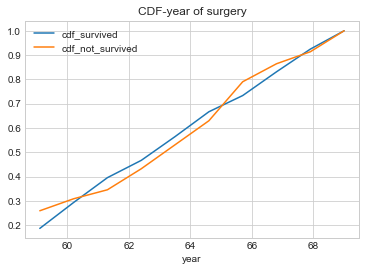

In [14]:
#cdf curve for "year" by survival status.
plt.close()
counts_1,bins_1=np.histogram(df_cancer["year"][df_cancer.survival_status==1],bins=10,density=True)
print(counts_1)
print(bins_1)
pdf_1=counts_1*np.diff(bins_1)
cdf_1=np.cumsum(pdf_1)
plt.plot(bins_1[1:],cdf_1,label="cdf_survived")

counts_2,bins_2=np.histogram(df_cancer["year"][df_cancer.survival_status==2],bins=10,density=True)
print(counts_2)
print(bins_2)
pdf_2=counts_2*np.diff(bins_2)
cdf_2=np.cumsum(pdf_2)
plt.plot(bins_2[1:],cdf_2,label="cdf_not_survived")
plt.xlabel("year")
plt.title("CDF-year of surgery")
plt.legend()
plt.show()

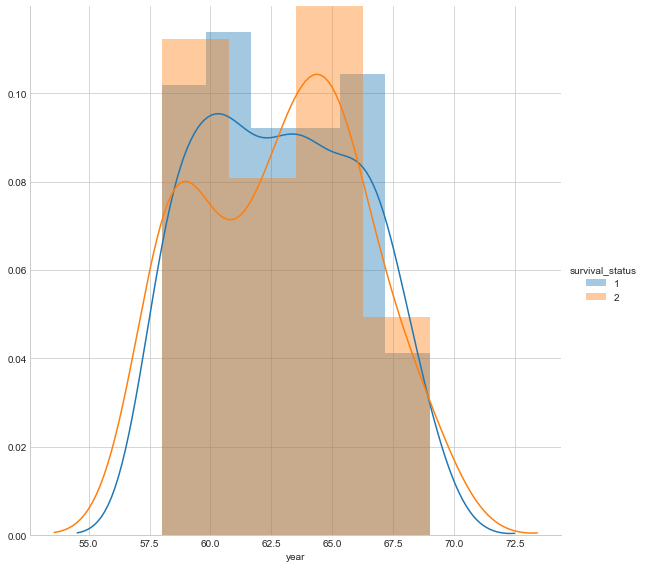

In [15]:
#Probability Density plot for surgery_year
plt.close()
sns.set_style("whitegrid")
sns.FacetGrid(df_cancer,hue="survival_status",size=8)\
   .map(sns.distplot,"year")\
   .add_legend();
plt.show()

#### Conclusion:
1. Surgeries performed b/w the year[58,62] were comparatively more effective as survival rate is high and surgeries b\w year [63,67] were least effective.  
1. There is almost 100% overlap(from cdf curve).
2. So,"year" can not be used for classification of survival status.
3. This classification can not be achieved by considering only a single variable.We must look for  bivariate or multivariate approach.

### Bivariate Analysis:

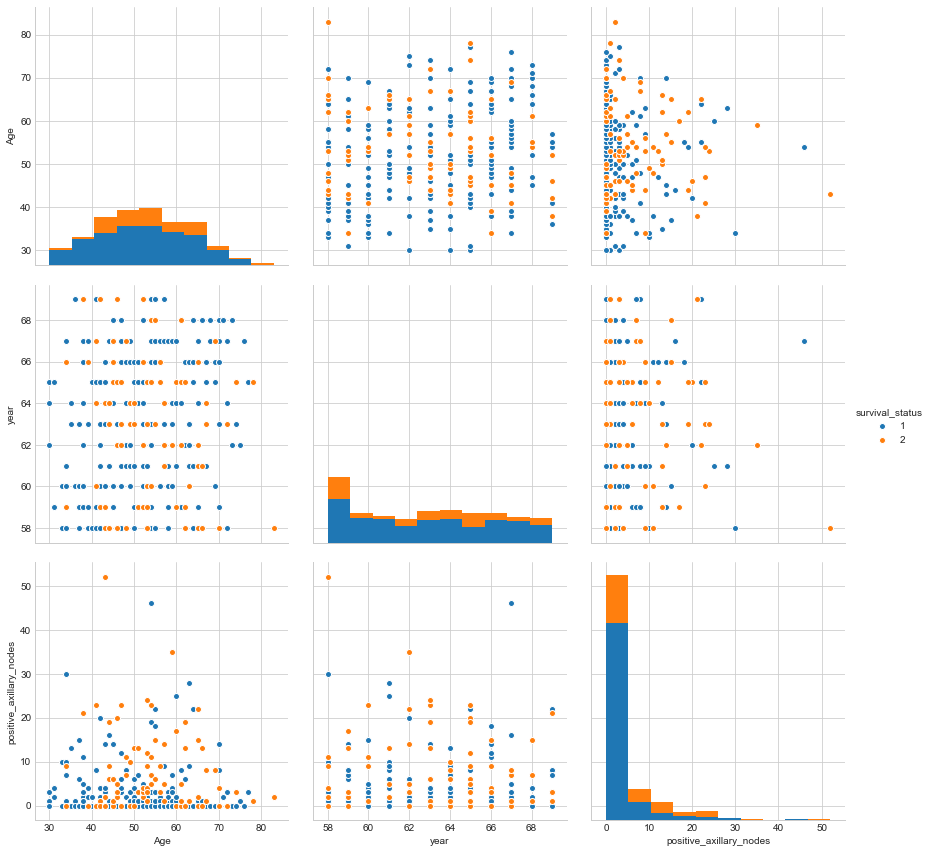

In [7]:
#Generating the pairplot
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df_cancer,vars=["Age","year","positive_axillary_nodes"],hue="survival_status",size=4)
plt.show()

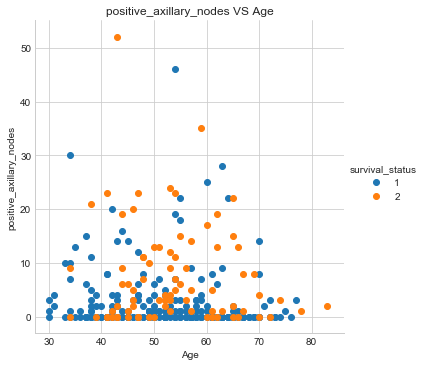

In [18]:
#Scatterplot positive_axillary_nodes VS Age
plt.close()
sns.set_style("whitegrid");
sns.FacetGrid(df_cancer,hue="survival_status",size=5)\
   .map(plt.scatter,"Age","positive_axillary_nodes")\
   .add_legend();
plt.title("positive_axillary_nodes VS Age")
plt.show()

##### The above scatterplot also suggests that Less no. of positive nodes implies higher survival chances.

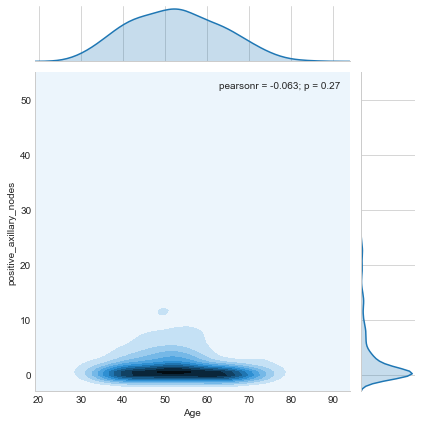

In [19]:
#Contour plot for Age and positive_axillary_nodes
sns.jointplot(x="Age",y="positive_axillary_nodes",data=df_cancer,kind="kde",size=6)
plt.show()

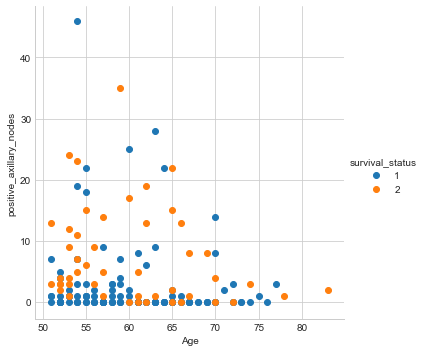

In [20]:
#Now generating the Age VS positive_axillary_node scatterplot only for age>50
#to see the effect of old age on survival
plt.close()
sns.set_style("whitegrid");
sns.FacetGrid(df_cancer[df_cancer.Age>50],hue="survival_status",size=5)\
   .map(plt.scatter,"Age","positive_axillary_nodes")\
   .add_legend();
plt.show()

[0.05989912 0.06935687 0.04728878 0.05359395 0.03467844 0.04413619
 0.02837327 0.01891551 0.01891551 0.00945776]
[51.  53.6 56.2 58.8 61.4 64.  66.6 69.2 71.8 74.4 77. ]
[0.10416667 0.04557292 0.01953125 0.04557292 0.0390625  0.03255208
 0.00651042 0.00651042 0.00651042 0.00651042]
[51.  54.2 57.4 60.6 63.8 67.  70.2 73.4 76.6 79.8 83. ]


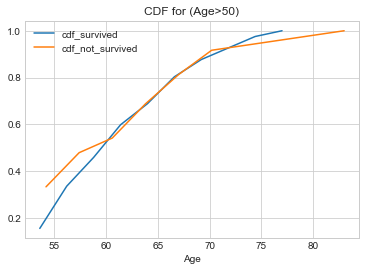

In [22]:
#df_cancer[df_cancer.Age>50]
df_50=df_cancer[df_cancer.Age>50]
counts_1,bins_1=np.histogram(df_50["Age"][df_50.survival_status==1],bins=10,density=True)
print(counts_1)
print(bins_1)
pdf_1=counts_1*np.diff(bins_1)
cdf_1=np.cumsum(pdf_1)
plt.plot(bins_1[1:],cdf_1,label="cdf_survived")

counts_2,bins_2=np.histogram(df_50["Age"][df_50.survival_status==2],bins=10,density=True)
print(counts_2)
print(bins_2)
pdf_2=counts_2*np.diff(bins_2)
cdf_2=np.cumsum(pdf_2)
plt.plot(bins_2[1:],cdf_2,label="cdf_not_survived")
plt.xlabel("Age")
plt.legend()
plt.title("CDF for (Age>50)")
plt.show()

[0.18531718 0.01781896 0.         0.00356379 0.00534569 0.0017819
 0.0017819  0.         0.         0.0017819 ]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.13095238 0.04166667 0.0297619  0.0297619  0.02380952 0.00595238
 0.01785714 0.         0.         0.00595238]
[ 0.   3.5  7.  10.5 14.  17.5 21.  24.5 28.  31.5 35. ]


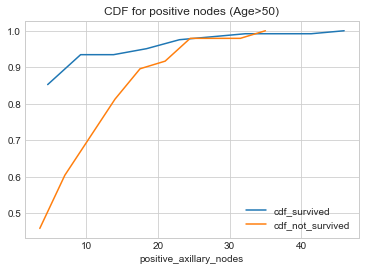

In [23]:
plt.close()
counts_1,bins_1=np.histogram(df_50["positive_axillary_nodes"][df_50.survival_status==1],bins=10,density=True)
print(counts_1)
print(bins_1)
pdf_1=counts_1*np.diff(bins_1)
cdf_1=np.cumsum(pdf_1)
plt.plot(bins_1[1:],cdf_1,label="cdf_survived")

counts_2,bins_2=np.histogram(df_50["positive_axillary_nodes"][df_50.survival_status==2],bins=10,density=True)
print(counts_2)
print(bins_2)
pdf_2=counts_2*np.diff(bins_2)
cdf_2=np.cumsum(pdf_2)
plt.plot(bins_2[1:],cdf_2,label="cdf_not_survived")
plt.xlabel("positive_axillary_nodes")
plt.legend()
plt.title("CDF for positive nodes (Age>50)")
plt.show()

#### Conclusion:
      1.As for Age>50,there is nearly 75% overlap between the Age groups of two classes(survived/not survived),
      observed from cdf for Age.
      2.Hence,patient age has little impact on their survival after surgery.
      3.Those who survived in age>50,90% of them have positive axillary nodes<(6or7).
      4.Those who did not survive in age>50,only around 45% of them have positive axillary nodes>(6or7).
      5.Hence,no. of positive nodes is affecting the patient's survival.

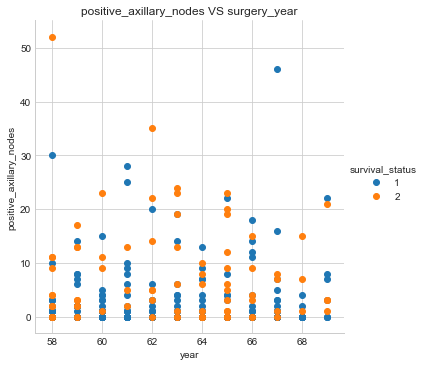

In [24]:
#positive_axillary_nodes VS year scatterplot
plt.close()
sns.set_style("whitegrid");
sns.FacetGrid(df_cancer,hue="survival_status",size=5)\
   .map(plt.scatter,"year","positive_axillary_nodes")\
   .add_legend();
plt.title("positive_axillary_nodes VS surgery_year")
plt.show()

 
Surgeries performed during the year [60,62] saw very less failures(around 13) and those b\w the year[64,67] saw most failures.

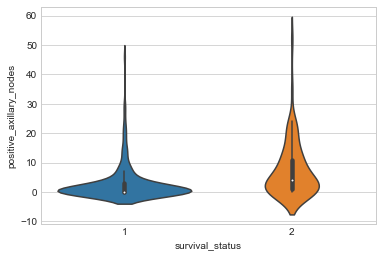

In [25]:
plt.close()
sns.violinplot(x="survival_status",y="positive_axillary_nodes",data=df_cancer)
plt.show()

#### Conclusion:
      1.As already concluded less no. of positive nodes results in higher survival chances.The above plot also shows this        effect.
      2.Also,overall data consists of large no zeroes or smaller values for positive axillary nodes.

#### Final Conclusion:
      1.Number of positive axillary nodes seems to have  effect on the survival status.But, sharp classification can't be         achieved.
      2.Almost 80% patients have positive axillary nodes<5.This makes the data imbalance.
      3.No other attribute seems to have significant effect on the survival class.